In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
with open('/home/piotr/Dokumenty/SI/imo/IMO/lab/data/kroa200.tsp', 'r') as f:
    lines = f.readlines()
    data = np.zeros((200, 2), dtype=int)
    for line in lines:
        words = line.split(' ')
        try:
            it = int(words[0])
            data[it - 1] = np.array([int(words[1]), int(words[2])])
        except:
            continue
data[:3]

array([[1357, 1905],
       [2650,  802],
       [1774,  107]])

In [18]:
matrix = np.zeros((200, 200), dtype=int)

for i in range(200):
    for j in range(200):
        if i == j:
            matrix[i][j] = 1e9
        else:
            xa = data[i,0]
            xb = data[j,0]
            ya = data[i,1]
            yb = data[j,1]
            matrix[i][j] = int(np.sqrt((xa - xb)**2 + (ya - yb)**2) + 0.5)

array([[1000000000,       1700,       1846, ...,        452,       1163,
              2616],
       [      1700, 1000000000,       1118, ...,       1250,       2651,
              1504],
       [      1846,       1118, 1000000000, ...,       1536,       2320,
              2615],
       ...,
       [       452,       1250,       1536, ..., 1000000000,       1535,
              2228],
       [      1163,       2651,       2320, ...,       1535, 1000000000,
              3760],
       [      2616,       1504,       2615, ...,       2228,       3760,
        1000000000]])

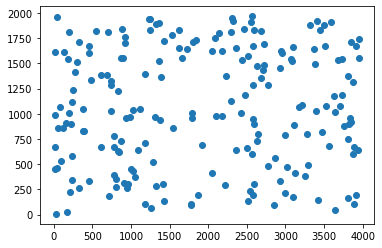

In [21]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [22]:
cycleA = []
cycleB = []

left_down = np.argmin(data[:, 0] * data[:,1])
right_up = np.argmax(data[:, 0] * data[:,1])

86

[0, 2, 3, 6, 8, 9, 10, 11, 13, 14, 15, 17, 18, 23, 25, 26, 28, 31, 32, 35, 36, 39, 43, 44, 45, 47, 48, 50, 51, 52, 56, 58, 59, 60, 62, 65, 68, 72, 73, 77, 80, 81, 83, 84, 86, 91, 92, 95, 96, 98, 99, 169, 193, 121, 125, 115, 187, 165, 164, 117, 198, 123, 137, 152, 178, 103, 135, 118, 183, 196, 189, 109, 174, 155, 171, 148, 158, 120, 173, 105, 162, 179, 191, 130, 107, 141, 116, 110, 114, 188, 100, 146, 131, 190, 144, 197, 192, 127, 122, 166] [101, 102, 104, 106, 108, 111, 112, 113, 119, 124, 126, 128, 129, 132, 133, 134, 136, 138, 139, 140, 142, 143, 145, 147, 149, 150, 151, 153, 154, 156, 157, 159, 160, 161, 163, 167, 168, 170, 172, 175, 176, 177, 180, 181, 182, 184, 185, 186, 194, 195, 199, 57, 42, 87, 55, 97, 4, 27, 33, 37, 38, 70, 89, 85, 24, 16, 71, 49, 94, 82, 93, 61, 7, 21, 90, 75, 74, 69, 53, 22, 5, 1, 34, 41, 46, 54, 20, 67, 30, 66, 63, 19, 29, 79, 64, 88, 76, 78, 12, 40]


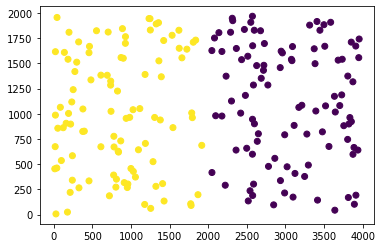

In [50]:
cycleA = [i for i in range(100)]
cycleB = [i + 100 for i in range(100)]

impr = True
_max = -1e9
_global_max = _max
while impr:
    impr = False
    move = None
    best_move = None
    _max = -1e9
    for i in range(len(cycleA)):
        for j in range(len(cycleB)):
            a, b = cycleA[i],cycleB[j]
            cycleA[i] = b
            cycleB[j] = a
            
            ma = np.average(data[cycleA], axis=0)
            mb = np.average(data[cycleB], axis=0)
            
            cycleA[i] = a
            cycleB[j] = b            

            
            if np.sqrt(np.sum((ma - mb)**2)) > _max:
                best_move = [cycleA[i],cycleB[j]]
                _max = np.sqrt(np.sum((ma - mb)**2))
                # print(move)

    if best_move is not None and _max > _global_max:
        cycleA.remove(best_move[0])
        cycleB.remove(best_move[1])
        cycleA.append(best_move[1])
        cycleB.append(best_move[0])
        _global_max = _max
        impr = True

y = np.zeros(200, dtype=int)
y[cycleA] = 1
y[cycleB] = 0

plt.scatter(data[:,0], data[:,1], c=y)
plt.show()

In [51]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

